dataset link : https://www.kaggle.com/datasets/d4rklucif3r/restaurant-reviews

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [3]:
df = pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t',quoting=3)
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Liked,1000.0,0.5,0.50025,0.0,0.0,0.5,1.0,1.0


### Pie Chart

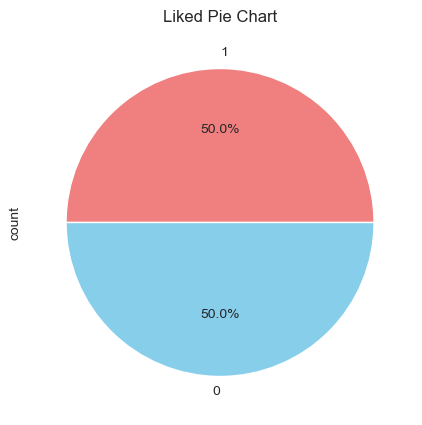

In [6]:
#pie chart

plt.figure(figsize=(10,5))

df['Liked'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['lightcoral', 'skyblue'], )
plt.title('Liked Pie Chart')

plt.show()


### plotting the length of reviews

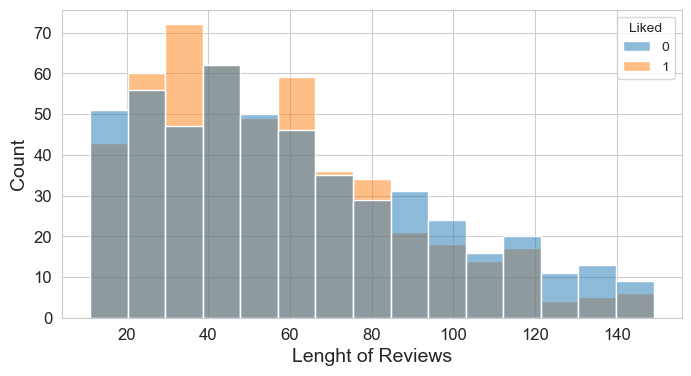

In [7]:
df['Len'] = df['Review'].apply(len) # Adding 'Len' column to show the length of reviews

plt.figure(figsize = (8,4))
sns.histplot(x = 'Len',data = df,hue = 'Liked')
plt.xlabel('Lenght of Reviews',size = 14)
plt.ylabel('Count',size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

df.drop('Len',axis = 1,inplace = True) # Removing the 'Len' column

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mustafakapici/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Cleaning the text

In [9]:
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
ps = PorterStemmer()

In [10]:
corpus = []
for i in range(0,len(df)):
    # values that are not letters have been removed from review of i
    review = re.sub('[^a-zA-Z]',' ',df['Review'][i])

    review = review.lower()

    # converting to list
    review = review.split()

    # check each word in review of i, subtract the stopwords and get the root of the rest of the words
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]

    # converting to string and append the corpus list
    review = ' '.join(review)
    corpus.append(review)

### Creating the Bag of Words model

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
x = cv.fit_transform(corpus).toarray()
y = df.iloc[:,-1].values

### Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
def calculate_scores(y_pred,algorithmName):
    global df_result,index

    from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    acc = accuracy_score(y_test,y_pred).round(3)
    precision = precision_score(y_test,y_pred).round(3)
    recall = recall_score(y_test,y_pred).round(3)

    d = {'classifier':[algorithmName],'accuracy':[acc],'precision':[precision],'recall':[recall],'true positive':[tp],
         'true negative':[tn],'false positive':[fp],'false negative':[fn]}
    new_df = pd.DataFrame(data = d,index = [index])
    df_result = pd.concat([df_result,new_df])
    index += 1

### Random Forest

In [14]:
def random_forest():
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(criterion='entropy',n_estimators = 100).fit(x_train,y_train)
    y_pred = rfc.predict(x_test)
    calculate_scores(y_pred,'Random Forest')

### Decision Tree

In [15]:
def decision_tree():
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(criterion='entropy').fit(x_train,y_train)
    y_pred = dtc.predict(x_test)
    calculate_scores(y_pred,'Decision Tree')

### KNN

In [16]:
def knn():
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=23).fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    calculate_scores(y_pred,'KNN')

### Naive Bayes

In [17]:
def naive_bayes():
    from sklearn.naive_bayes import GaussianNB
    classifier = GaussianNB().fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    calculate_scores(y_pred,'Naive Bayes')

### MLP

In [18]:
def mlp():
    from sklearn.neural_network import MLPClassifier
    mlp = MLPClassifier().fit(x_train,y_train)
    y_pred = mlp.predict(x_test)
    calculate_scores(y_pred,'MLP')

### Logistic Regression

In [19]:
def logistic_reg():
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression().fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    calculate_scores(y_pred,'Logistic Regression')

### Results

In [20]:
df_result = pd.DataFrame()
index = 1
functions = [random_forest,decision_tree,knn,naive_bayes,mlp,logistic_reg]
for function in functions:
    function()

df_result.sort_values(by = 'accuracy',ascending=False)

,classifier,accuracy,precision,recall,true positive,true negative,false positive,false negative
5,MLP,0.800,0.812,0.796,82,78,19,21
1,Random Forest,0.775,0.882,0.650,67,88,9,36
6,Logistic Regression,0.775,0.815,0.728,75,80,17,28
2,Decision Tree,0.750,0.805,0.680,70,80,17,33
4,Naive Bayes,0.730,0.684,0.883,91,55,42,12
3,KNN,0.645,0.695,0.553,57,72,25,46
